## Solving End to End Business Problem

Business problems are often complex and solving them often needs many analytical patches stitched together.
One of the main tasks of the data scientist is to thorouhly understand and assess the problem statement, then to process it to find insights that will ease the decision making process.

Let's understand how to see the bigger picture of the problem and then divide it into small deliverable analysis.

#### Ask Questions

To solve any business problem one needs to know the problem very well. The art of questioning makes this process easier. I follow the 3W approach (Why, Who and What).

#### Why?

- **Purpose**: Gives you the reason behind doing the analysis. Having a clear purpose is important because in the world of analytics it is very easy to get lost in the data. The clearly defined purpose leads you in the proper direction of thoughts and analysis.
- **End Goal**: Sets the expectations clear in terms of the output.

#### Who?

- **Target Audience**: Gives you the details about the consumers of the analysis. It can be internal team or external clients but knowing your audience is important because of the following two reasons:
    - **User interface and Interpretability**: Your audience is your prompt in making the user interface. It should be made so that the user understands the analysis.
    - **Story Telling**: Knowing your audience and their background enables you to explain them better.

#### What?

- **Details**: Gives you details about the problem statement as well as the solution design.

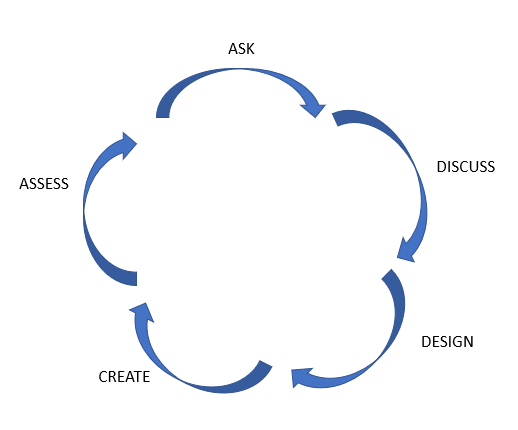

# Churn Analysis

The following topics will be covered:

- What is Churn?
- How to define churn for your industry?
- How to measure Churn?
- Minimising the Churn
- Tracking the Churn
- How to predict Churn and Assessing the reasons behind the Churn?

### What is Churn?

- Customer moving out of your Business
- Customers have some past and future monetary value associated with them
- Every customer churned is a loss in the future

Hence there is a need to do Churn Analysis, so these customers moving out can be prevented

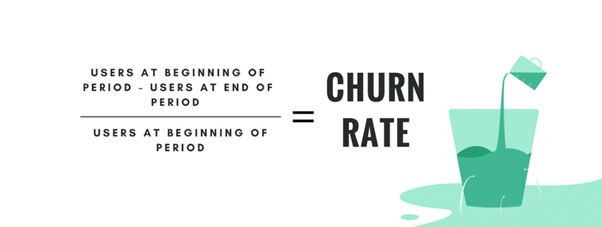

### How to define churn for your Industry?

The definition of the churn is highly dependent on the nature of the Industry. In case of churn the nature of the industry is divided into Subscription based and non subsription based industries.

Let's see how Churn definition varies in these industries.

#### Subscription based industries

These industries are those whose customers are tied to the business through the subscription of the services. e.g. Telecom, Netflix

Defining churn in these industries is an easy task. A customer is considered churned based on the non renewal of the subscription.

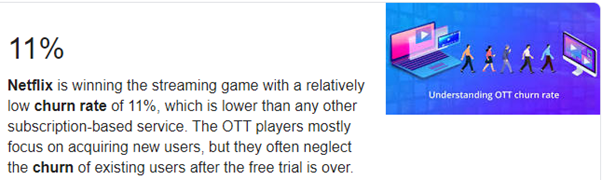

#### Non Subscription based industries

It is difficult to define churn in these businesses as the customer is not bounded by any subscription and there is no hard indicator of the churn. Such industries are e-commerce, fintech etc where the customer interacts only when he needs the service and otherwise remains dormant. This is the reason we need proxy data, some data which will imply the occurance of the churn.

The most commonly used parameters are Recency, Frequency and Monetary parameters (RFM). Let's have a look at them!

- **Recency**: How much time has elapsed since a customer’s last activity or transaction with the brand? Activity is usually a purchase, although variations are sometimes used, e.g., the last visit to a website or use of a mobile app. In most cases, the more recently a customer has interacted or transacted with a brand, the more likely that customer will be responsive to communications from the brand.
- **Frequency**: How often has a customer transacted or interacted with the brand during a particular period of time? Clearly, customers with frequent activities are more engaged, and probably more loyal, than customers who rarely do so. And one-time-only customers are in a class of their own.
- **Monetary**: Also referred to as “monetary value,” this factor reflects how much a customer has spent with the brand during a particular period of time. Big spenders should usually be treated differently than customers who spend little. Looking at monetary divided by frequency indicates the average purchase amount – an important secondary factor to consider when segmenting customers.

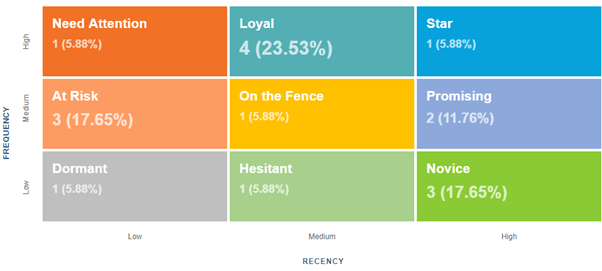

### Measuring and interpreting the Churn

- Only a single number doesn’t give the full picture
- Form multiple measures
- Divide customer data across various factors like geography, service etc

Churn can be measured on three levels:
1. Volume of churn (Customer Count)
2. Percentage of churn
3. Associated monetary value

Look at all these measures in conjunction

### Preventing / Minimising the Churn

- Targeted marketing
- Product assessment and improvement

**Do you have to prevent every churn?**

No, it depends on the **Customer Lifetime Value** (CLV). CLV is the total value the company is going to get from the customer in the entire relationship with that customer. This includes all past, current and future interactions of the customer with the company.

Knowing the customer lifetime value is important because there is some monetary value invested in retaining the customer. e.g. marketing cost and if the cost involved in retaining a customer gets higher than their CLV then there is no point in preventing that churn.

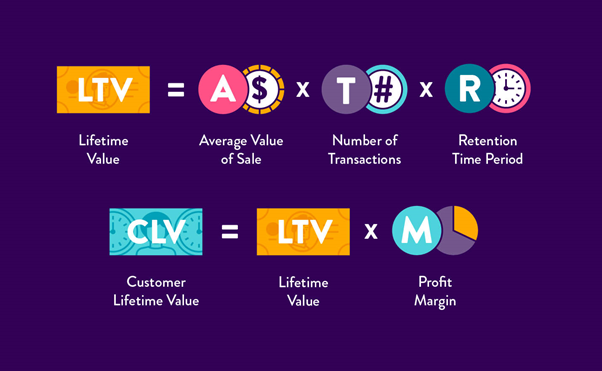

image source: Clevertap

### Tracking Churn

Churn tracking is basically tracking all your customers so as to know if the churned customers have returned to your business. This step is essential because it gives you the pointers on whether your churn preventing measures are working.

### Predicting Churn

#### Subscription based Industries

For subscription based businesses, since the data can be labelled as churn or not churn based on the subscription status, the prediction becomes a 2 class classification problem.

In this scenario one of the challenges could be to figure out the independent variables which are affecting or prompting the churn. These variables mostly depends on the nature of the business and also on the behavior pattern of the customer.
Few of the variables could be customer complaint data, App performance, User rating, recency, frequency, monetary factor of the customer etc.

#### Non Subscription based industries

For non subscription based businesses, the churn can be predicted through the probablistic models. One such model is "Buy Till You Die".

“Buy ‘Til You Die” probabilistic models help us in quantifying the lifetime value of a customer by assessing the expected number of his future transactions and his probability of being “alive”

This algorithm makes use of the Negative Binomial Distribution. This distribution is a discrete probability distribution that models the number of failures in a sequence of independent and identically distributed Bernoulli trials before a specified (non-random) number of successes (denoted r) occurs.

![SegmentLocal](Negbinomial.gif "segment")

#### BTYD Implementation

Importing the dataset. The dataset is a transaction log with the date of purchase and ID of the customer. The dataset contains the purchase log for the year of 2014, with 15273 purchases.

In [34]:
from lifetimes.datasets import load_transaction_data
transaction_data = load_transaction_data()
transaction_data.head()

,date,id
0,2014-03-08 00:00:00,0
1,2014-05-21 00:00:00,1
2,2014-03-14 00:00:00,2
3,2014-04-09 00:00:00,2
4,2014-05-21 00:00:00,2


In [35]:
transaction_data.shape

(15273, 2)

In [37]:
min(transaction_data.date) , max(transaction_data.date)

('2014-01-01 00:00:00', '2014-12-31 00:00:00')

Now let's transform the data in terms of frequency, recency and duration (T) for every customer.

- **frequency** represents the number of repeat purchases the customer has made. This means that it’s one less than the total number of purchases. It’s the count of time periods the customer had a purchase in. So if using days as units, then it’s the count of days the customer had a purchase on.

- **recency** represents the age of the customer when they made their most recent purchases. This is equal to the duration between a customer’s first purchase and their latest purchase. (Thus if they have made only 1 purchase, the recency is 0.)

- **T** represents the age of the customer in whatever time units chosen. This is equal to the duration between a customer’s first purchase and the end of the period under study

In [71]:
from lifetimes.utils import summary_data_from_transaction_data

summary = summary_data_from_transaction_data(transaction_data,
                                             customer_id_col = 'id',
                                             datetime_col = 'date',
                                             observation_period_end='2014-12-31')

summary.head(10)

,frequency,recency,T
id,,,
0,0.0,0.0,298.0
1,0.0,0.0,224.0
2,6.0,142.0,292.0
3,0.0,0.0,147.0
4,2.0,9.0,183.0
5,1.0,77.0,251.0
6,0.0,0.0,150.0
7,1.0,1.0,316.0
8,1.0,80.0,214.0


The model used here is BetaGeoFitter and it has methods which gives 2 parameters: 1. Expected number of purchase 2. Live probability

In [81]:
from lifetimes import BetaGeoFitter

bgf = BetaGeoFitter(penalizer_coef=0.001)
bgf = bgf.fit(summary['frequency'], summary['recency'], summary['T'])

In [84]:
t = 90
exp_purchase = bgf.conditional_expected_number_of_purchases_up_to_time(t,
                                                        summary['frequency'],
                                                        summary['recency'],
                                                        summary['T'])

In [86]:
exp_purchase.sort_values(ascending=False).head()

id
1623    24.060898
3552    22.992545
3348    20.411733
987     14.520783
1124    13.419297
dtype: float64

In [88]:
is_alive = bgf.conditional_probability_alive(summary['frequency'],
                                  summary['recency'],
                                  summary['T'])

In [89]:
is_alive

array([1.        , 1.        , 0.05959715, ..., 1.        , 1.        ,
       1.        ])

In [90]:
is_alive = pd.Series(is_alive).reset_index()
is_alive[is_alive[0]<0.5].shape[0]/is_alive.shape[0]

0.475

**Assessing model performance**

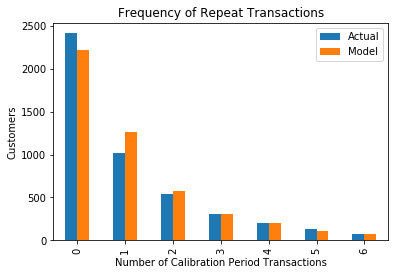

In [78]:
from lifetimes.plotting import plot_period_transactions
plot_period_transactions(bgf)

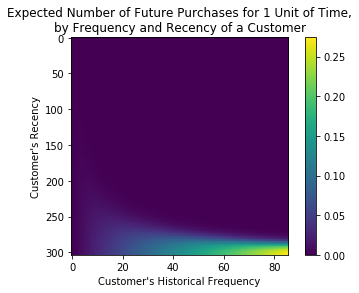

In [67]:
from lifetimes.plotting import plot_frequency_recency_matrix

plot_frequency_recency_matrix(bgf)

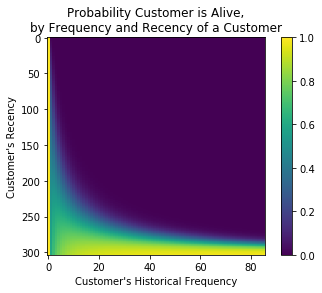

In [68]:
from lifetimes.plotting import plot_probability_alive_matrix

plot_probability_alive_matrix(bgf)

Resources:
1. https://readthedocs.org/projects/lifetimes/downloads/pdf/latest/
2. https://towardsdatascience.com/predicting-customer-lifetime-value-with-buy-til-you-die-probabilistic-models-in-python-f5cac78758d9
3. https://clevertap.com/blog/customer-lifetime-value/
4. https://www.muvi.com/blogs/ott-churn-management-strategy-like-netflix.html